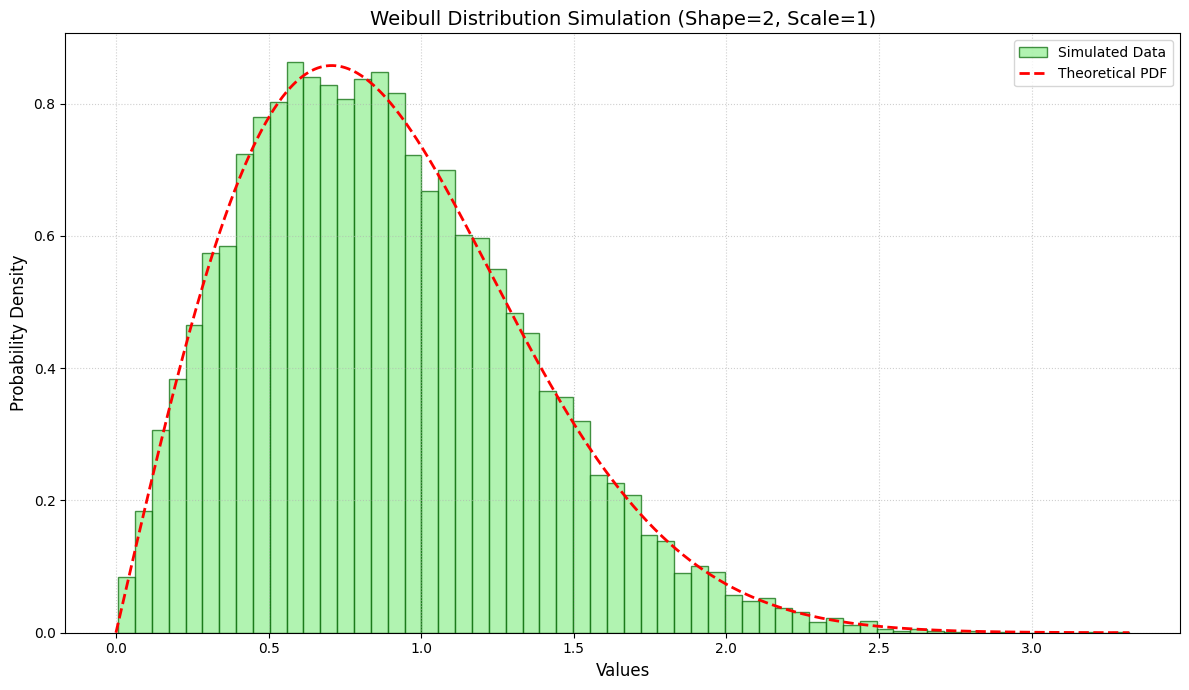

Simulated Data Statistics:
- Mean: 0.8843
- Variance: 0.2130

Theoretical Distribution Statistics:
- Mean: 0.8862
- Variance: 0.2146


/var/folders/5m/w0rlpsxd7yx_97nl1gx0dfzm0000gn/T/ipykernel_40413/1254882676.py:43: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  theoretical_mean = scale_param**(-1/shape_param) * np.math.gamma(1 + 1/shape_param)
/var/folders/5m/w0rlpsxd7yx_97nl1gx0dfzm0000gn/T/ipykernel_40413/1254882676.py:44: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  theoretical_variance = scale_param**(-2/shape_param) * (np.math.gamma(1 + 2/shape_param) - (np.math.gamma(1 + 1/shape_param))**2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Weibull parameters
shape_param = 2  # Alpha in Weibull distribution
scale_param = 1  # Lambda in Weibull distribution
sample_size = 15000  # Number of data points to generate

# Generate Weibull distributed random variables using the formula from part 2
uniform_samples = np.random.uniform(0, 1, sample_size)
weibull_samples = (-np.log(uniform_samples) / scale_param)**(1/shape_param)

# Create and customize the plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.hist(weibull_samples, bins=60, density=True, alpha=0.7, color='lightgreen', edgecolor='darkgreen', label='Simulated Data')

# Generate theoretical PDF
x_range = np.linspace(0, max(weibull_samples), 1000)
theoretical_pdf = scale_param * shape_param * x_range**(shape_param-1) * np.exp(-scale_param * x_range**shape_param)

# Plot theoretical PDF
ax.plot(x_range, theoretical_pdf, 'r--', lw=2, label='Theoretical PDF')

# Customize plot appearance
ax.set_title(f'Weibull Distribution Simulation (Shape={shape_param}, Scale={scale_param})', fontsize=14)
ax.set_xlabel('Values', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

# Calculate and display statistics
simulated_mean = np.mean(weibull_samples)
simulated_variance = np.var(weibull_samples)

print(f"Simulated Data Statistics:")
print(f"- Mean: {simulated_mean:.4f}")
print(f"- Variance: {simulated_variance:.4f}")

# Calculate theoretical statistics
theoretical_mean = scale_param**(-1/shape_param) * np.math.gamma(1 + 1/shape_param)
theoretical_variance = scale_param**(-2/shape_param) * (np.math.gamma(1 + 2/shape_param) - (np.math.gamma(1 + 1/shape_param))**2)

print(f"\nTheoretical Distribution Statistics:")
print(f"- Mean: {theoretical_mean:.4f}")
print(f"- Variance: {theoretical_variance:.4f}")

Approximate slope of log(error) vs log(sample size): -0.57


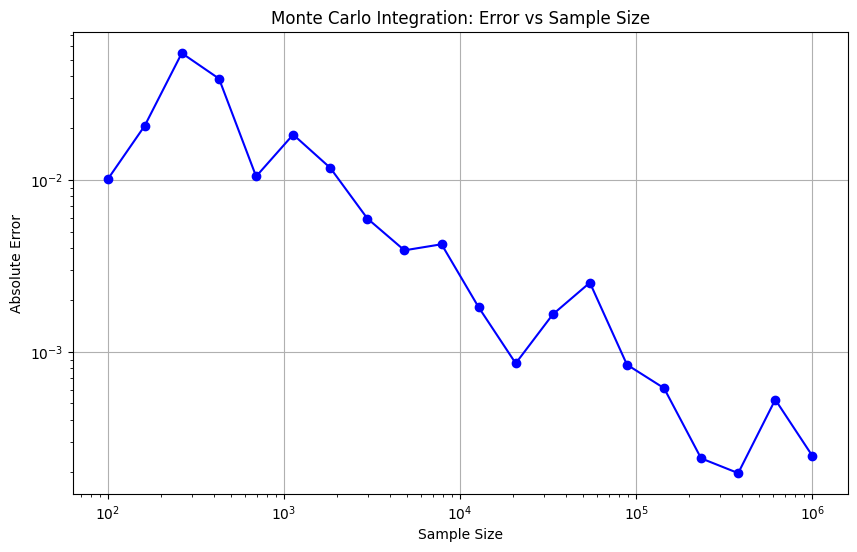

Exact integral value: 1.333333
Final Monte Carlo estimate (with 1000000 samples): 1.333086
Final absolute error: 0.000248


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 0.5 * x**3 - x**2 + 1

def monte_carlo_integration(num_samples):
    x = np.random.uniform(0, 2, num_samples)
    y = f(x)
    integral_estimate = 2 * np.mean(y)
    return integral_estimate

def exact_integral():
    return (1/8 * 2**4 - 1/3 * 2**3 + 2)

sample_sizes = np.logspace(2, 6, 20, dtype=int)
estimates = [monte_carlo_integration(n) for n in sample_sizes]
exact = exact_integral()
errors = np.abs(np.array(estimates) - exact)

plt.figure(figsize=(10, 6))
plt.loglog(sample_sizes, errors, 'bo-')
plt.xlabel('Sample Size')
plt.ylabel('Absolute Error')
plt.title('Monte Carlo Integration: Error vs Sample Size')
plt.grid(True)

slope, _ = np.polyfit(np.log(sample_sizes), np.log(errors), 1)
print(f"Approximate slope of log(error) vs log(sample size): {slope:.2f}")

plt.show()

print(f"Exact integral value: {exact:.6f}")
print(f"Final Monte Carlo estimate (with {sample_sizes[-1]} samples): {estimates[-1]:.6f}")
print(f"Final absolute error: {errors[-1]:.6f}")